# Gathering statistics of NBA players

### Abstract
The big data revolution or data explosion has enabled industries to make significantly more informed decisions than before, particularly in the realm of sports. Big data will now and forever be a part of sports analysis, and whoever effectively leverages this data as a tool, will hold a competitive advantage over their opponents. In this assignment we are gathering data of NBA players, teams and games.They are further cleaned and combined to form entity relationship diagrams. All the statistics of NBA players from including 1949 are sourced.

### Data
Data gathered from API
#### Player data:
playerId
firstName
heightFt	
heightInc	
lastName	
position	
weight	
teamId

#### Team data:
id	
abbreviation	
city	
conference	
division	
full_name	
name

#### Game data:
gameId	
date	
home_team_score	
visitor_team_score	
homeTeamId	
visitorTeamId

#### Point Statistics DATA:
statId	
playerId	
points

In [3]:
import requests
import pandas as pd
import json
import os

# DATASOURCE 1 - Using API

We create 4 tables : Players,Teams,Game,Stat and clean them by removing duplicates and checking null values.We will use these tables further in the assignment by combining and creating ER diagram for the same.

# Players Table making

In [4]:
nbaPlayersJson = []
nbaPlayersApi = 'https://www.balldontlie.io/api/v1/players'
page = '?page='
per_page = '&per_page=100'
for num in range(0, 5):
    nbaPlayersData = requests.get(nbaPlayersApi + page + str(num) + per_page)
    nbaPlayersJson += nbaPlayersData.json()['data']
#nbaPlayersApi = 'https://www.balldontlie.io/api/v1/players?per_page=1000'
#nbaData = requests.get(nbaPlayersApi)

In [5]:
#nbaJson = nbaData.json()['data']
cols = ["id","first_name","height_feet","height_inches","last_name","position","weight_pounds","team"]
playersDf = pd.DataFrame(nbaPlayersJson, columns = cols)

Renaming the Columns

In [6]:
playersDf = playersDf.rename(columns = {"id":"playerId","first_name":"firstName","height_feet":"heightFt","height_inches":"heightInc","last_name":"lastName","position":"position","weight_pounds":"weight","team":"teamId"})
playersDf.head()

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId
0,14,Ike,NaN,NaN,Anigbogu,C,NaN,"{'id': 12, 'abbreviation': 'IND', 'city': 'Ind..."
1,25,Ron,NaN,NaN,Baker,G,NaN,"{'id': 20, 'abbreviation': 'NYK', 'city': 'New..."
2,47,Jabari,NaN,NaN,Bird,G,NaN,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost..."
3,67,MarShon,NaN,NaN,Brooks,G,NaN,"{'id': 15, 'abbreviation': 'MEM', 'city': 'Mem..."
4,71,Lorenzo,NaN,NaN,Brown,G,NaN,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor..."


In [7]:
df1 = pd.DataFrame(x['id'] for x in playersDf["teamId"]).rename(columns={0:"teamId"})
playersDf["teamId"] = df1["teamId"]


Shape of the data

In [8]:
playersDf.shape

(500, 8)

Displaying first few rows and columns : 

In [9]:
playersDf.head()

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId
0,14,Ike,NaN,NaN,Anigbogu,C,NaN,12
1,25,Ron,NaN,NaN,Baker,G,NaN,20
2,47,Jabari,NaN,NaN,Bird,G,NaN,2
3,67,MarShon,NaN,NaN,Brooks,G,NaN,15
4,71,Lorenzo,NaN,NaN,Brown,G,NaN,28


Check if Unique: 

In [10]:
playersDf['playerId'].is_unique

False

In [11]:
playersDf[playersDf.duplicated(['playerId'])].sort_values(by=["playerId"])

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId
106,1,Alex,6.0,6.0,Abrines,G,200.0,21
100,14,Ike,NaN,NaN,Anigbogu,C,NaN,12
101,25,Ron,NaN,NaN,Baker,G,NaN,20
102,47,Jabari,NaN,NaN,Bird,G,NaN,2
103,67,MarShon,NaN,NaN,Brooks,G,NaN,15
...,...,...,...,...,...,...,...,...
196,567,Isiah,NaN,NaN,Thomas,,NaN,9
197,568,Brad,NaN,NaN,Lohaus,,NaN,17
198,569,Mike,NaN,NaN,Brown,,NaN,29
199,570,Kenny,NaN,NaN,Battle,,NaN,24


Dropping the duplicate playerId's : 

In [12]:
playersDf.drop_duplicates(subset='playerId',keep='first',inplace=True)

In [13]:
playersDf[playersDf.duplicated(['playerId'])].sort_values(by=["playerId"])

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId


In [14]:
playersDf.shape

(400, 8)

In [15]:
playersDf.sort_values(by=["playerId"])

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId
6,1,Alex,6.0,6.0,Abrines,G,200.0,21
0,14,Ike,NaN,NaN,Anigbogu,C,NaN,12
1,25,Ron,NaN,NaN,Baker,G,NaN,20
2,47,Jabari,NaN,NaN,Bird,G,NaN,2
3,67,MarShon,NaN,NaN,Brooks,G,NaN,15
...,...,...,...,...,...,...,...,...
496,867,Bill,NaN,NaN,Edwards,,NaN,23
497,868,Andrew,NaN,NaN,Gaze,,NaN,30
498,869,Alphonso,NaN,NaN,Ford,,NaN,21
499,870,Andres,NaN,NaN,Guibert,,NaN,18


Check for Null Values : if any important column like PlayerId is null or not : 

In [16]:
playersDf.isnull().any()

playerId     False
firstName    False
heightFt      True
heightInc     True
lastName     False
position     False
weight        True
teamId       False
dtype: bool

PLotting the Dataframe : 

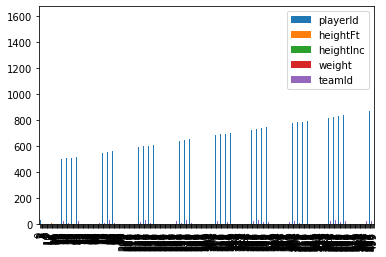

In [17]:
playersDf.plot(kind='bar')
plt.show()

# Create Teams,Games,Stats Dataset similar to Players

# Teams table Making


In [18]:
nbaTeamJson = []
nbaTeamApi = 'https://www.balldontlie.io/api/v1/teams'
page = '?page='
per_page = '&per_page=100'
for num in range(0, 5):
    nbaTeamData = requests.get(nbaTeamApi + page + str(num) + per_page)
    nbaTeamJson += nbaTeamData.json()['data']

In [19]:
cols = ["id","abbreviation","city","conference","division","full_name","name"]
teamDf = pd.DataFrame(nbaTeamJson, columns = cols)

In [20]:
teamDf.sort_values(by="id")

,id,abbreviation,city,conference,division,full_name,name
0,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Hawks
30,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Hawks
1,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
31,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
2,3,BKN,Brooklyn,East,Atlantic,Brooklyn Nets,Nets
32,3,BKN,Brooklyn,East,Atlantic,Brooklyn Nets,Nets
3,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets
33,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets
4,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls
34,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls


In [21]:
teamDf.shape

(60, 7)

In [22]:
teamDf['id'].is_unique

False

In [23]:
teamDf.drop_duplicates(subset='id',keep='first',inplace=True)

In [24]:
teamDf.shape

(30, 7)

In [25]:
teamDf['id'].is_unique

True

# Games Table Making


In [26]:
nbaGamesJson = []
nbaGameApi = 'https://www.balldontlie.io/api/v1/games'
page = '?page='
per_page = '&per_page=100'
for num in range(0, 5):
    nbaGameData = requests.get(nbaGameApi + page + str(num) + per_page)
    nbaGamesJson += nbaGameData.json()['data']

In [27]:
nbaGamesJson

[{'id': 47179,
  'date': '2019-01-30T00:00:00.000Z',
  'home_team': {'id': 2,
   'abbreviation': 'BOS',
   'city': 'Boston',
   'conference': 'East',
   'division': 'Atlantic',
   'full_name': 'Boston Celtics',
   'name': 'Celtics'},
  'home_team_score': 126,
  'period': 4,
  'postseason': False,
  'season': 2018,
  'status': 'Final',
  'time': ' ',
  'visitor_team': {'id': 4,
   'abbreviation': 'CHA',
   'city': 'Charlotte',
   'conference': 'East',
   'division': 'Southeast',
   'full_name': 'Charlotte Hornets',
   'name': 'Hornets'},
  'visitor_team_score': 94},
 {'id': 48751,
  'date': '2019-02-09T00:00:00.000Z',
  'home_team': {'id': 2,
   'abbreviation': 'BOS',
   'city': 'Boston',
   'conference': 'East',
   'division': 'Atlantic',
   'full_name': 'Boston Celtics',
   'name': 'Celtics'},
  'home_team_score': 112,
  'period': 4,
  'postseason': False,
  'season': 2018,
  'status': 'Final',
  'time': '     ',
  'visitor_team': {'id': 13,
   'abbreviation': 'LAC',
   'city': 'LA',


In [28]:
cols = ["id","date","home_team_score","visitor_team_score","home_team","visitor_team"]
gameDf = pd.DataFrame(nbaGamesJson, columns = cols)

In [29]:
gameDf = gameDf.rename(columns = {"id":"gameId","date":"date","home_team_score":"home_team_score","visitor_team_score":"visitor_team_score","home_team":"homeTeamId","visitor_team":"visitorTeamId"})

In [30]:
df2 = pd.DataFrame(x['id'] for x in gameDf['homeTeamId']).rename(columns={0:"homeTeamId"})
df3 = pd.DataFrame(x['id'] for x in gameDf['visitorTeamId']).rename(columns={0:"visitorTeamId"})
gameDf["homeTeamId"] = df2["homeTeamId"]
gameDf["visitorTeamId"] = df3["visitorTeamId"]
gameDf.head()

,gameId,date,home_team_score,visitor_team_score,homeTeamId,visitorTeamId
0,47179,2019-01-30T00:00:00.000Z,126,94,2,4
1,48751,2019-02-09T00:00:00.000Z,112,123,2,13
2,48739,2019-02-08T00:00:00.000Z,117,110,23,8
3,48740,2019-02-08T00:00:00.000Z,119,106,30,6
4,48746,2019-02-08T00:00:00.000Z,102,96,26,16


In [31]:
gameDf.shape

(500, 6)

In [32]:
gameDf["gameId"].is_unique

False

In [33]:
gameDf.drop_duplicates(subset='gameId',keep='first',inplace=True)

In [34]:
gameDf.shape

(400, 6)

In [35]:
gameDf["gameId"].is_unique

True

# Stats table making

In [36]:
nbaStatJson = []
nbaStatApi = 'https://www.balldontlie.io/api/v1/stats'
page = '?page='
per_page = '&per_page=100'
for num in range(0, 5):
    nbaStatData = requests.get(nbaStatApi + page + str(num) + per_page)
    nbaStatJson += nbaStatData.json()['data']

In [37]:
cols = ["id","player","pts"]
statDf = pd.DataFrame(nbaStatJson, columns = cols)

In [38]:
statDf.shape

(500, 3)

In [39]:
statDf['id'].is_unique

False

In [40]:
statDf.head()

,id,player,pts
0,1069008,"{'id': 415, 'first_name': 'Iman', 'height_feet...",7.0
1,1069009,"{'id': 49, 'first_name': 'Nemanja', 'height_fe...",2.0
2,1069010,"{'id': 91, 'first_name': 'Willie', 'height_fee...",8.0
3,1069011,"{'id': 210, 'first_name': 'Buddy', 'height_fee...",24.0
4,1069012,"{'id': 161, 'first_name': 'De'Aaron', 'height_...",10.0


In [41]:
statDf = statDf.rename(columns = {"id":"statId","player":"playerId","pts":"points"})

In [42]:
df4 = pd.DataFrame(x['id'] for x in statDf['playerId']).rename(columns={0:"playerId"})
statDf['playerId'] = df4['playerId']

In [43]:
statDf

,statId,playerId,points
0,1069008,415,7.0
1,1069009,49,2.0
2,1069010,91,8.0
3,1069011,210,24.0
4,1069012,161,10.0
...,...,...,...
495,1069397,406,16.0
496,1069398,150,19.0
497,12781,218,NaN
498,1069399,305,9.0


In [44]:
statDf.isnull().any()

statId      False
playerId    False
points       True
dtype: bool

In [45]:
statDf.drop_duplicates(subset='statId',keep='first',inplace=True)

In [46]:
statDf['statId'].is_unique

True

In [47]:
statDf.shape

(400, 3)

Visualizing the StatDf :

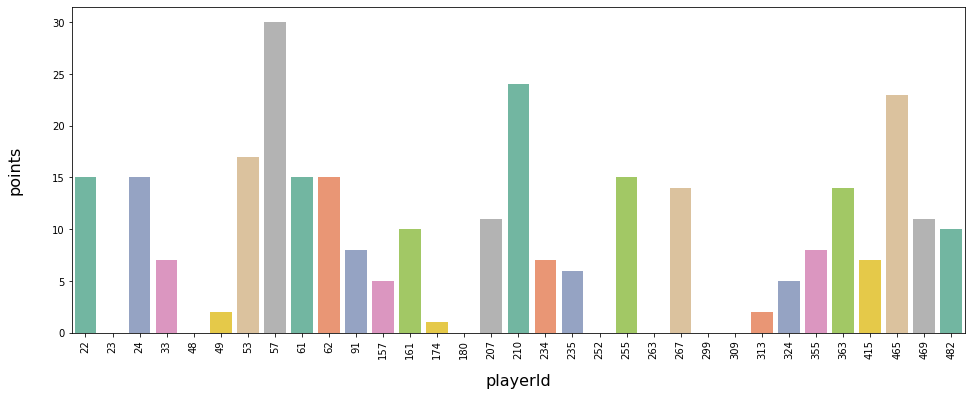

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'playerId', y='points', data=statDf.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

# DATASOURCE 2 - Using CSV file

In [80]:
import pandas as pd
df2 = pd.read_csv("player_data.csv")
df2

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [51]:
df2.isnull().any()

name          False
year_start    False
year_end      False
position       True
height         True
weight         True
birth_date     True
college        True
dtype: bool

In [52]:
df2.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [53]:
df2 = df2.fillna(0)

In [54]:
df2.isnull().any()

name          False
year_start    False
year_end      False
position      False
height        False
weight        False
birth_date    False
college       False
dtype: bool

In [55]:
df2.shape

(4550, 8)

In [56]:
df2.columns

Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')

# DATASOURCE 3 - Using Web Scraping using Beautiful Soup
Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

In [57]:
#importing the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

The website we use to scrape data is https://basketball.realgm.com/ visit to find more information on NBA Stats

Getting the html files from the page we need to scrape

In [58]:
my_url = 'https://basketball.realgm.com/nba/awards/by-type/Player-Of-The-Week/30'
response = requests.get(my_url)
soup = BeautifulSoup(response.content, 'html.parser')
container = soup.find('table', attrs={'class': 'tablesaw', 'data-tablesaw-mode': 'swipe'}).tbody
print(container.prettify)

<bound method Tag.prettify of <tbody><tr>
<td nowrap="" rel="2020" style="text-align: center;"><a href="/nba/awards/by-season/2020">2019-2020</a></td>
<td nowrap="" rel="Brown, Jaylen"><a href="/player/Jaylen-Brown/Summary/52544">Jaylen Brown</a></td>
<td nowrap="" rel="East" style="text-align: left;">East</td>
<td nowrap="" rel="20200203" style="text-align: left;">Feb 3, 2020</td>
<td nowrap="" rel="Boston Celtics">
<a href="/nba/teams/Boston-Celtics/2/Home">Boston Celtics</a>
</td>
<td nowrap="" rel="SF" style="text-align: center;">SF</td>
<td nowrap="" rel="79" style="text-align: center;">6-7</td>
<td nowrap="" rel="220" style="text-align: center;">220</td>
<td nowrap="" rel="23" style="text-align: center;">23</td>
<td rel="California"><a href="/ncaa/conferences/Pacific-12-Conference/7/California/237">California</a></td>
<td nowrap="" rel="2016" style="text-align: center;"><a href="/nba/draft/past_drafts/2016">2016</a></td>
<td nowrap="" rel="3" style="text-align: center;">3</td>
</

In [59]:
tr_s = container.find_all('tr')
tr_s

[<tr>
 <td nowrap="" rel="2020" style="text-align: center;"><a href="/nba/awards/by-season/2020">2019-2020</a></td>
 <td nowrap="" rel="Brown, Jaylen"><a href="/player/Jaylen-Brown/Summary/52544">Jaylen Brown</a></td>
 <td nowrap="" rel="East" style="text-align: left;">East</td>
 <td nowrap="" rel="20200203" style="text-align: left;">Feb 3, 2020</td>
 <td nowrap="" rel="Boston Celtics">
 <a href="/nba/teams/Boston-Celtics/2/Home">Boston Celtics</a>
 </td>
 <td nowrap="" rel="SF" style="text-align: center;">SF</td>
 <td nowrap="" rel="79" style="text-align: center;">6-7</td>
 <td nowrap="" rel="220" style="text-align: center;">220</td>
 <td nowrap="" rel="23" style="text-align: center;">23</td>
 <td rel="California"><a href="/ncaa/conferences/Pacific-12-Conference/7/California/237">California</a></td>
 <td nowrap="" rel="2016" style="text-align: center;"><a href="/nba/draft/past_drafts/2016">2016</a></td>
 <td nowrap="" rel="3" style="text-align: center;">3</td>
 </tr>, <tr>
 <td nowrap

In [60]:
stats = ['Season',"Player","Conference","Date","Team","Pos","Height","Weight","Age","Pre-draft team","Draft yr","YOS",]
df = pd.DataFrame(columns=stats)
tr_s = container.find_all('tr')
for tr in tr_s:
    td_s = tr.find_all('td')
    row = [td.text.replace('\n', '') for td in td_s]
    df = df.append(pd.Series(row, index=stats), ignore_index=True) #converting it into a dataframe

In [61]:
row

['1979-1980',
 'Julius Erving',
 '',
 'Oct 21, 1979',
 'Philadelphia Sixers',
 'SF',
 '6-6',
 '200',
 '30',
 'Massachusetts',
 '1972',
 '7']

In [62]:
df

,Season,Player,Conference,Date,Team,Pos,Height,Weight,Age,Pre-draft team,Draft yr,YOS
0,2019-2020,Jaylen Brown,East,"Feb 3, 2020",Boston Celtics,SF,6-7,220,23,California,2016,3
1,2019-2020,Damian Lillard,West,"Feb 3, 2020",Portland Trail Blazers,G,6-3,195,29,Weber State,2012,7
2,2019-2020,Pascal Siakam,East,"Jan 27, 2020",Toronto Raptors,F,6-9,230,25,New Mexico State,2016,3
3,2019-2020,Damian Lillard,West,"Jan 27, 2020",Portland Trail Blazers,G,6-3,195,29,Weber State,2012,7
4,2019-2020,Ben Simmons,East,"Jan 20, 2020",Philadelphia Sixers,PF,6-10,230,23,LSU,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1979-1980,Phil Ford,,"Nov 18, 1979",Kansas City Kings,G,6-2,175,24,North Carolina,1978,1
1334,1979-1980,Magic Johnson,,"Nov 11, 1979",Los Angeles Lakers,PG,6-9,255,20,Michigan State,1979,0
1335,1979-1980,Marques Johnson,,"Nov 4, 1979",Milwaukee Bucks,GF,6-7,218,24,UCLA,1977,2
1336,1979-1980,Micheal Ray Richardson,,"Oct 28, 1979",New York Knicks,PG,6-5,189,24,Montana,1978,1


In [63]:
#checking for missing values
df.isnull().any()

Season            False
Player            False
Conference        False
Date              False
Team              False
Pos               False
Height            False
Weight            False
Age               False
Pre-draft team    False
Draft yr          False
YOS               False
dtype: bool

In [64]:
df.shape

(1338, 12)

# Plotting Players against Teams and Conference
We plot the Players against the Teams from the 'Player of the week' dataset

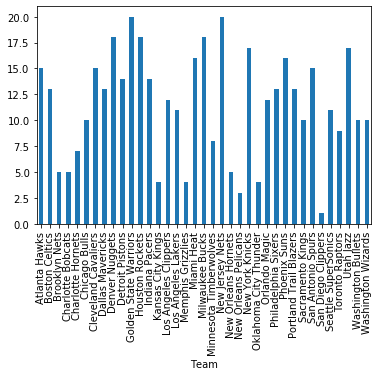

In [65]:
df.groupby('Team')['Player'].nunique().plot(kind='bar')
plt.show()

Plotting No of players vs Conference vs Teams on TABLEAU

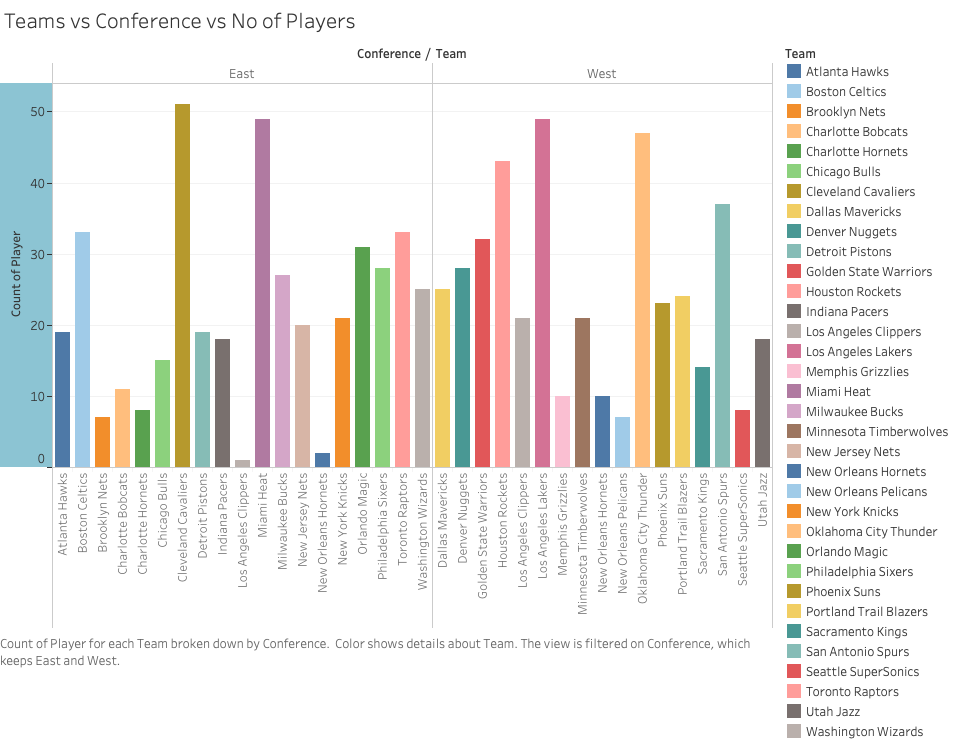

In [66]:
from IPython.display import Image
Image("Tableau.png")

# Conceptual Model

# From API dataset -- Combining the Players and Team Dataset on keys of TeamId(Players) and id(Teams) :

In [67]:
playersTeams_data_combined = pd.merge(playersDf,teamDf,left_on='teamId',right_on='id')                            
playersTeams_data_combined

,playerId,firstName,heightFt,heightInc,lastName,position,weight,teamId,id,abbreviation,city,conference,division,full_name,name
0,14,Ike,NaN,NaN,Anigbogu,C,NaN,12,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
1,679,Sean,NaN,NaN,Green,,NaN,12,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
2,700,Dale,NaN,NaN,Davis,,NaN,12,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
3,756,Malik,NaN,NaN,Sealy,,NaN,12,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
4,833,Antonio,NaN,NaN,Davis,,NaN,12,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,782,Jojo,NaN,NaN,English,,NaN,5,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls
396,789,Joe,NaN,NaN,Courtney,,NaN,5,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls
397,792,Ricky,NaN,NaN,Blanton,,NaN,5,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls
398,815,Corie,NaN,NaN,Blount,,NaN,5,5,CHI,Chicago,East,Central,Chicago Bulls,Bulls


In [68]:
playersTeams_data_combined = playersTeams_data_combined[["id","playerId","firstName","lastName","teamId","city","conference","division","full_name","name"]]
playersTeams_data_combined.head(400)

,id,playerId,firstName,lastName,teamId,city,conference,division,full_name,name
0,12,14,Ike,Anigbogu,12,Indiana,East,Central,Indiana Pacers,Pacers
1,12,679,Sean,Green,12,Indiana,East,Central,Indiana Pacers,Pacers
2,12,700,Dale,Davis,12,Indiana,East,Central,Indiana Pacers,Pacers
3,12,756,Malik,Sealy,12,Indiana,East,Central,Indiana Pacers,Pacers
4,12,833,Antonio,Davis,12,Indiana,East,Central,Indiana Pacers,Pacers
...,...,...,...,...,...,...,...,...,...,...
395,5,782,Jojo,English,5,Chicago,East,Central,Chicago Bulls,Bulls
396,5,789,Joe,Courtney,5,Chicago,East,Central,Chicago Bulls,Bulls
397,5,792,Ricky,Blanton,5,Chicago,East,Central,Chicago Bulls,Bulls
398,5,815,Corie,Blount,5,Chicago,East,Central,Chicago Bulls,Bulls


# From API Dataset -- Combining the Teams and Game Dataset on keys of HomeTeam(Games) and id(Teams) :

In [69]:
GameTeams_data_combined =  pd.merge(gameDf,teamDf,left_on='homeTeamId',right_on='id')                            
GameTeams_data_combined

,gameId,date,home_team_score,visitor_team_score,homeTeamId,visitorTeamId,id,abbreviation,city,conference,division,full_name,name
0,47179,2019-01-30T00:00:00.000Z,126,94,2,4,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
1,48751,2019-02-09T00:00:00.000Z,112,123,2,13,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
2,48777,2019-02-13T00:00:00.000Z,118,110,2,9,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
3,49076,2019-04-01T00:00:00.000Z,110,105,2,16,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
4,48945,2019-03-14T00:00:00.000Z,126,120,2,26,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49059,2019-03-30T00:00:00.000Z,132,108,13,6,13,LAC,LA,West,Pacific,LA Clippers,Clippers
396,49115,2019-04-05T00:00:00.000Z,117,122,13,14,13,LAC,LA,West,Pacific,LA Clippers,Clippers
397,49152,2019-04-10T00:00:00.000Z,143,137,13,29,13,LAC,LA,West,Pacific,LA Clippers,Clippers
398,12,2018-10-17T00:00:00.000Z,98,107,13,8,13,LAC,LA,West,Pacific,LA Clippers,Clippers


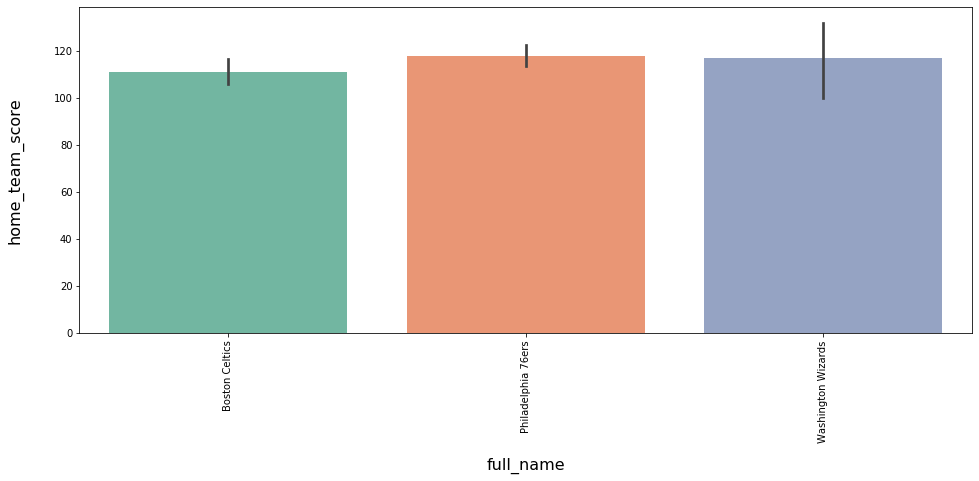

In [70]:

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x= 'full_name', y='home_team_score', data=GameTeams_data_combined.head(33), palette='Set2')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

# From API Dataset -- Combining the Stats and Player Dataset on keys of PlayerID(Stats) and PlayerId(Players) :

In [71]:
StatsPlayers_data_combined = pd.merge(statDf,playersDf,left_on='playerId',right_on='playerId')                            
StatsPlayers_data_combined

,statId,playerId,points,firstName,heightFt,heightInc,lastName,position,weight,teamId
0,1069020,263,NaN,Kosta,7.0,0.0,Koufos,C,245.0,26
1,1069094,241,NaN,Amir,6.0,9.0,Johnson,C-F,240.0,23
2,1069353,241,NaN,Amir,6.0,9.0,Johnson,C-F,240.0,23
3,1069217,179,6.0,Marcin,NaN,NaN,Gortat,C,NaN,13
4,1069311,90,12.0,Omri,NaN,NaN,Casspi,F,NaN,15


In [72]:
playersDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 499
Data columns (total 8 columns):
playerId     400 non-null int64
firstName    400 non-null object
heightFt     4 non-null float64
heightInc    4 non-null float64
lastName     400 non-null object
position     400 non-null object
weight       4 non-null float64
teamId       400 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 28.1+ KB


In [73]:
statDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 499
Data columns (total 3 columns):
statId      400 non-null int64
playerId    400 non-null int64
points      348 non-null float64
dtypes: float64(1), int64(2)
memory usage: 12.5 KB


In [74]:
gameDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 499
Data columns (total 6 columns):
gameId                400 non-null int64
date                  400 non-null object
home_team_score       400 non-null int64
visitor_team_score    400 non-null int64
homeTeamId            400 non-null int64
visitorTeamId         400 non-null int64
dtypes: int64(5), object(1)
memory usage: 21.9+ KB


In [75]:
teamDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 7 columns):
id              30 non-null int64
abbreviation    30 non-null object
city            30 non-null object
conference      30 non-null object
division        30 non-null object
full_name       30 non-null object
name            30 non-null object
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


# Creating Entity Relationship Model

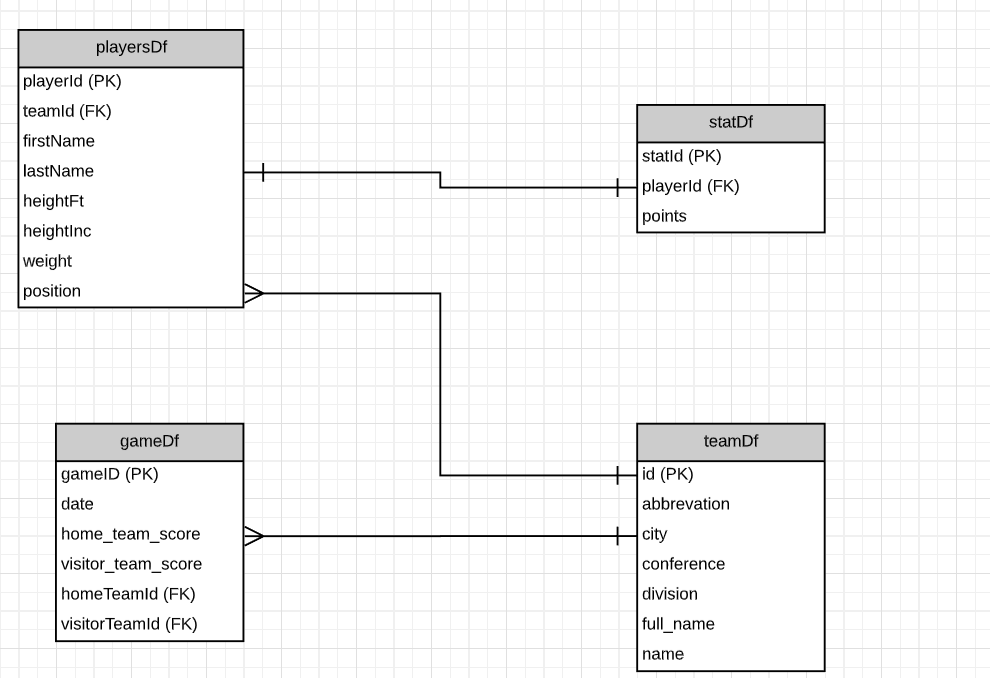

In [76]:
from IPython.display import Image
Image("Assignment1_ERD.png")

The above image is an Entity - Diagram that shows the relationship between the merged data. The primary keys between Game and Teamid merging was 'teamid'/'id'and between Game and Team was 'Home team id'/'id' and finally between Player and Points was 'playerId'


### Audit Validity/Acurracy
In this fast moving digital world, having accurate data is one of the most important aspects of data collection. Incorrect data may result from migration of data from one database to another, presence of incorrect values, or even time-bound data changes.Reviewing is an efficient way to check the correctness of the data.To review we cheked for duplicates, dropped the missing values and also the null values.

### Audit Completeness
Data completeness refers to whether there are any gaps in the data from what was expected to be collected, and what was actually collected.The problem of incomplete data can be resolved by ensuring that the data cannot be submitted, unless all expected data is present. Having a mandatory feild of PlayerID, Game ID and Team ID has made sure there is completeness and has resulted in less time consumption for audting completeness.


### Audit Consistency/Uniformity
The mandatory fields from the data prove to be consistent when they act as a promiary key while combining the tables from API datasource.

### Report
Firsty,Data was gathered in 3 different ways.

1.Using API to extract data.
 -requests (or urllib2 or the like) to connect to the URL.
 -json to parse the JSON output and extract the data needed.
 

2.By loading the csv file:
Data extracted using read.csv()
csv file - player_data.csv
Libraries used: pandas
Step 2. Cleaning and Auditing Data
Data auditing was done using describe, isnull, any, shape, columns, is_unique, info

3.Using the website to scrap the data
Data was extracted from the site https://basketball.realgm.com/ using the libraries Requests,
Beautifulsoup and pandas. Matplotlib and Tableau was used to plot relationship diagrams.

Secondly, a conceptual model was built to gain further insights.

Files used: playersDf, gameDf, statDf, teamDf
Files generated: playersTeams_data_combined, GameTeams_data_combined, StatsPlayers_data_combined
The data from the four different datasets are merged together to get meaningful insights.

Step 1: Extraction of Data using API key. There was no key needed because of the open source platform.

Step 2: Player and Team data combined: pd.merge(playersDf,teamDf,left_on='teamId',right_on='id') 

Step 3: Game and Team data combined: pd.merge(gameDf,teamDf,left_on='homeTeamId',right_on='id')

Step 4: Player and Points data combined: pd.merge(statDf,playersDf,left_on='playerId',right_on='playerId')



### Conclusion:
The data is identified, extracted, cleaned as well as integrated in order to gain a good dataset which is suitable for both exploration and analysis. With the 4 datasets from API we are able to find a player's team, the games a team have played amd how many points the player has scored.

### Contirbution:
I contributed By Own: 20%
Provided by the professor : 30%
By External source: 50%

### Citation:

https://learning.oreilly.com/library/view/web-scraping-with/9781491910283/ch04.html

https://www.youtube.com/watch?v=SPtEh9c5Xf4

https://stackoverflow.com/questions/7884567/python-web-scraping-beautiful-soup

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/ 

https://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python

https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html 

https://www.balldontlie.io/api/v1/


## LICENSE

Copyright 2020 Vasuki Manoharan and Ankita Tiwari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
